In [1]:
import numpy as np
import matplotlib.pyplot as plt
from BubbleGraph import BubbleGraph
from reachable_BG import reachable
from max_score_one_BG import max_score_one, optimal_shot
import time
from GUI import GUI

### Experiment looking at the average 10 shot score and run time for a greedy algorithm

In [3]:
times = [[]]*19
scores = [[]]*19

graph_size   = []
run_times    = []
total_scores = []

for i,n in enumerate(range(10,101,5)):
    for j in range(100):
        # initialize the matrix,object
        graph = BubbleGraph.random_graph(n,n,5,2)
        queue = [np.random.randint(1,6) for _ in range(10)]
        start = time.time()
        ten_shot_score = 0
        for k in range(len(queue)):
            
            reachables = reachable(graph)
            graph, score = optimal_shot(bg = graph, bubble = queue.pop(0), reachables = reachables)
            ten_shot_score += score
            
        run_time = time.time() - start                                
        times[i].extend([run_time])
        scores[i].extend([ten_shot_score])
        
    avg_time = sum(times[i]) / len(times[i])
    avg_score = sum(scores[i]) / len(scores[i])
    graph_size.extend([n])
    run_times.extend([avg_time])
    total_scores.extend([avg_score])
    print('Graph Size: ',n,' x ',n,' Average Run Time: %1.5f' % avg_time,' Average Score: %3.5f' % avg_score)


Graph Size:  10  x  10  Average Run Time: 0.00908  Average Score: 635.70000
Graph Size:  15  x  15  Average Run Time: 0.01167  Average Score: 819.82500
Graph Size:  20  x  20  Average Run Time: 0.01409  Average Score: 939.61667
Graph Size:  25  x  25  Average Run Time: 0.01629  Average Score: 1035.48750
Graph Size:  30  x  30  Average Run Time: 0.01849  Average Score: 1081.11000
Graph Size:  35  x  35  Average Run Time: 0.02060  Average Score: 1154.98333
Graph Size:  40  x  40  Average Run Time: 0.02270  Average Score: 1225.30000
Graph Size:  45  x  45  Average Run Time: 0.02471  Average Score: 1282.81250
Graph Size:  50  x  50  Average Run Time: 0.02677  Average Score: 1341.28333
Graph Size:  55  x  55  Average Run Time: 0.02887  Average Score: 1408.08500
Graph Size:  60  x  60  Average Run Time: 0.03094  Average Score: 1462.98182
Graph Size:  65  x  65  Average Run Time: 0.03308  Average Score: 1514.77917
Graph Size:  70  x  70  Average Run Time: 0.03543  Average Score: 1563.41154
Gr

Text(0.5, 1.0, 'Avg 10 shot score')

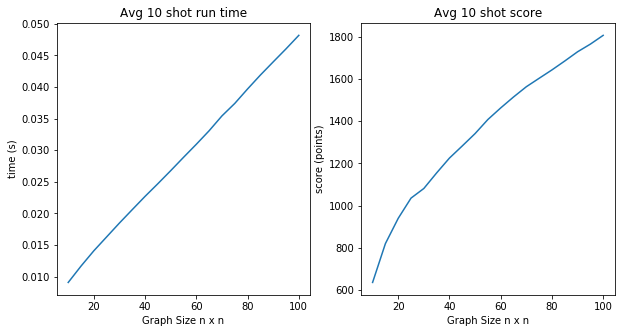

In [4]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.plot(graph_size,run_times)
plt.xlabel('Graph Size n x n')
plt.ylabel('time (s)')
plt.title('Avg 10 shot run time')
plt.subplot(1,2,2)
plt.plot(graph_size,total_scores)
plt.xlabel('Graph Size n x n')
plt.ylabel('score (points)')
plt.title('Avg 10 shot score')



## Visualizing a 10 shot sequence

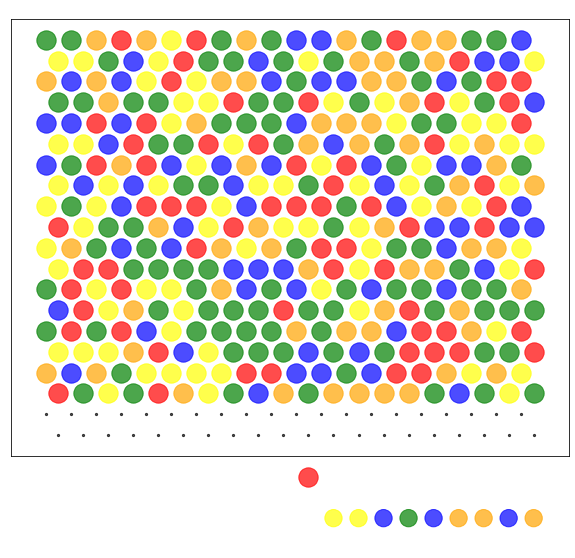

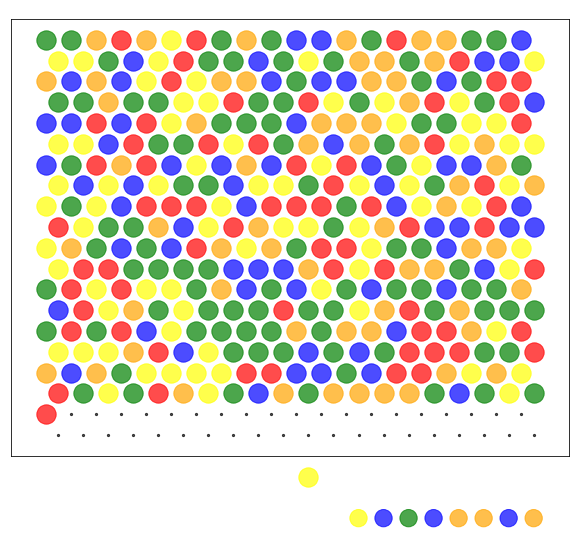

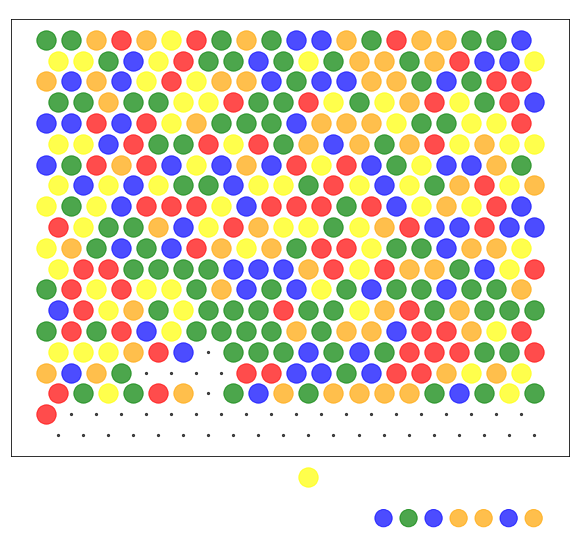

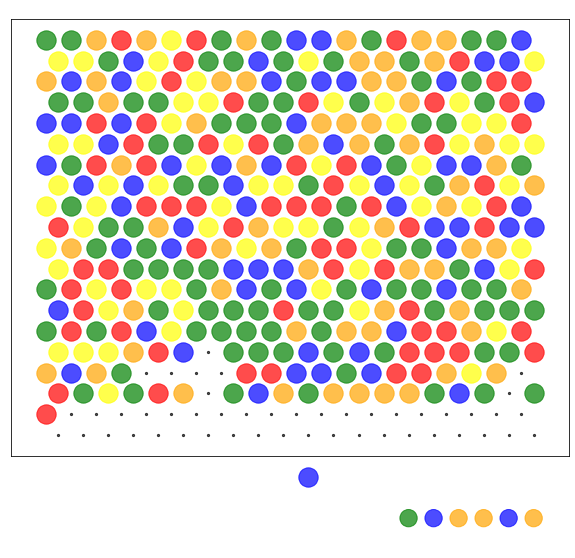

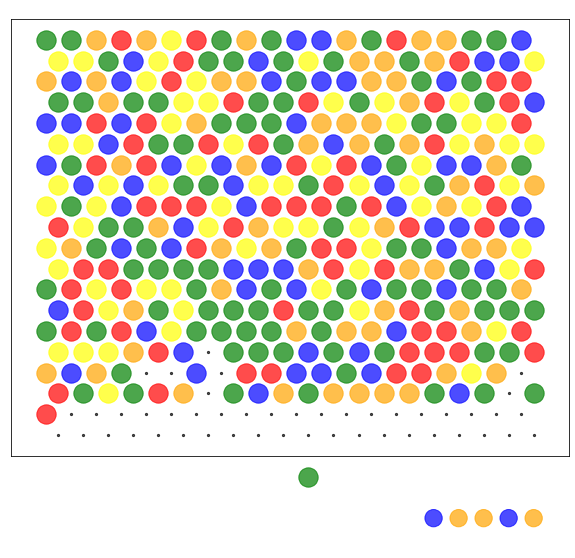

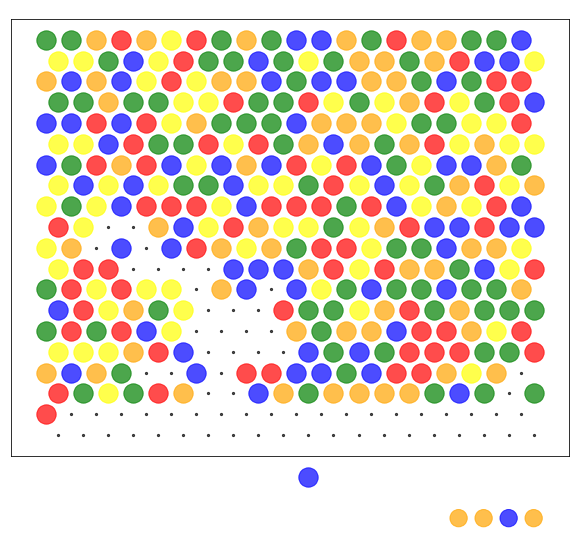

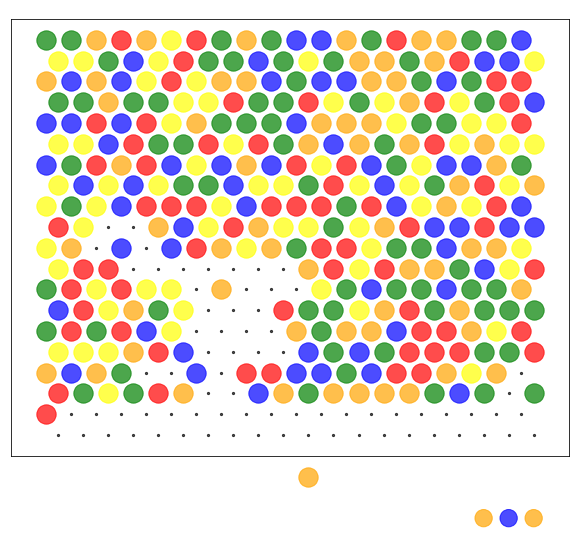

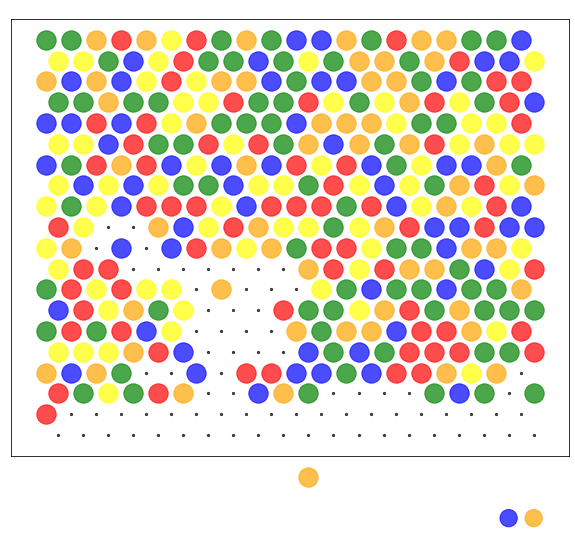

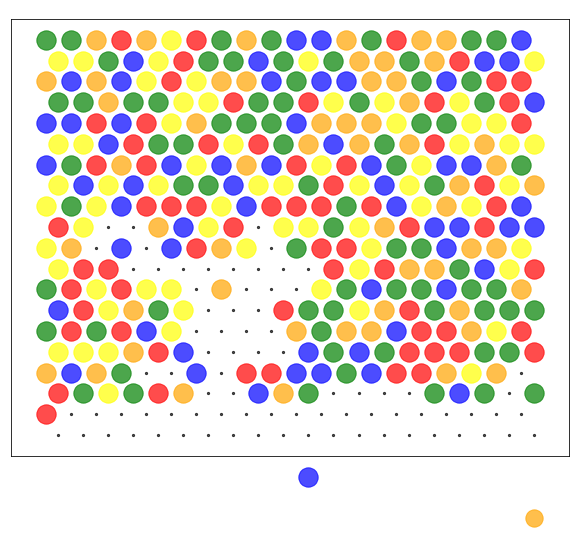

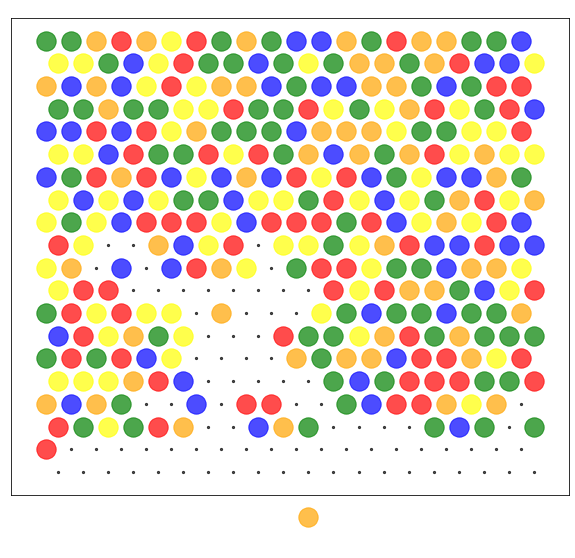

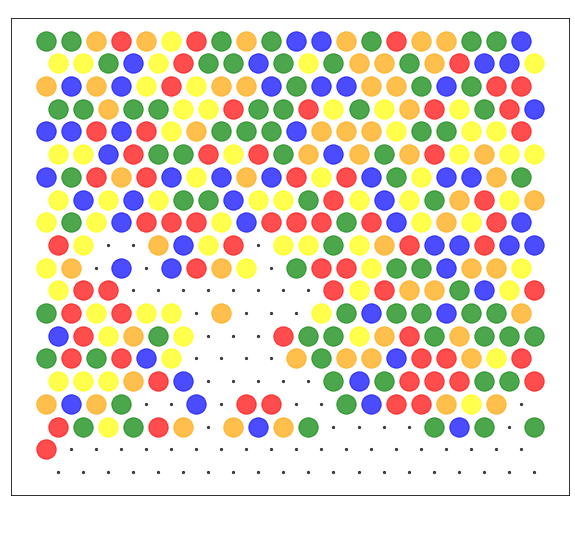

In [5]:
graph = BubbleGraph.random_graph(20,20,5,2)
queue = [np.random.randint(1,6) for _ in range(10)]
q_len = len(queue)
viz = GUI()
viz.load_matrix(graph.matrix)
viz.load_bubble(queue[0])
viz.load_queue(queue[1:])
viz.show()


for k in range(q_len):
    
    reachables = reachable(graph)
    graph, score = optimal_shot(bg = graph, bubble = queue.pop(0), reachables = reachables)
    viz.load_matrix(graph.matrix)
    if k == q_len -1:
        viz.load_bubble(-1)
        viz.load_queue([])
    else:
        viz.load_bubble(queue[0])
        viz.load_queue(queue[1:])
        
    viz.show()
    

    